In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5486,ham,Ofcourse I also upload some songs,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4342,ham,Its a valentine game. . . send dis msg to all ...
2068,ham,Its hard to believe things like this. All can ...
3418,spam,Do you want a new Video phone? 600 anytime any...
5070,ham,As in different styles?
4754,ham,U wan 2 haf lunch i'm in da canteen now.


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2345,ham,"Hi this is yijue, can i meet u at 11 tmr?"
4477,ham,I anything lor.
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
5230,ham,"Nope, I'm still in the market"
3191,ham,Is ur paper today in e morn or aft?


In [11]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

## EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


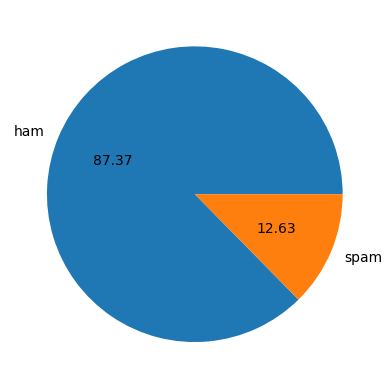

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Data is imbalanced
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91971\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Relationship between characteristics

In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

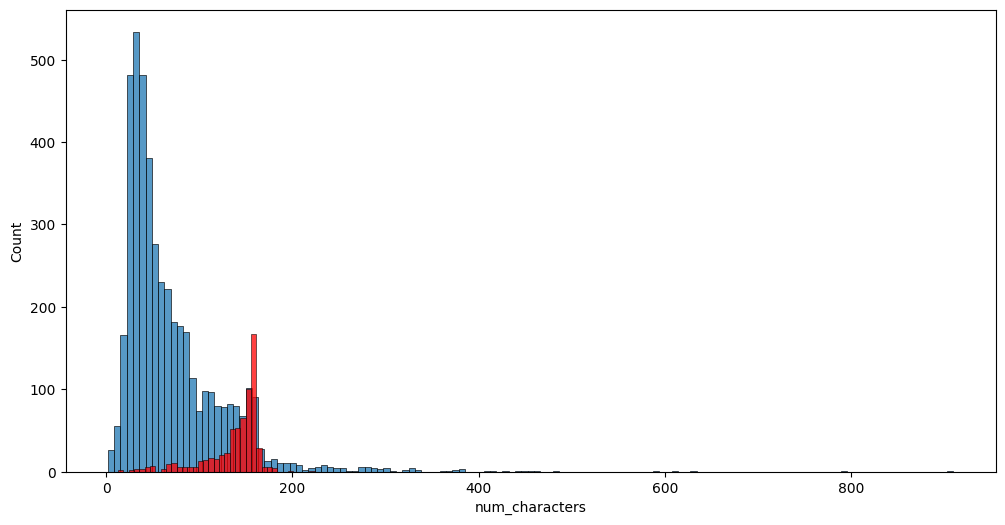

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

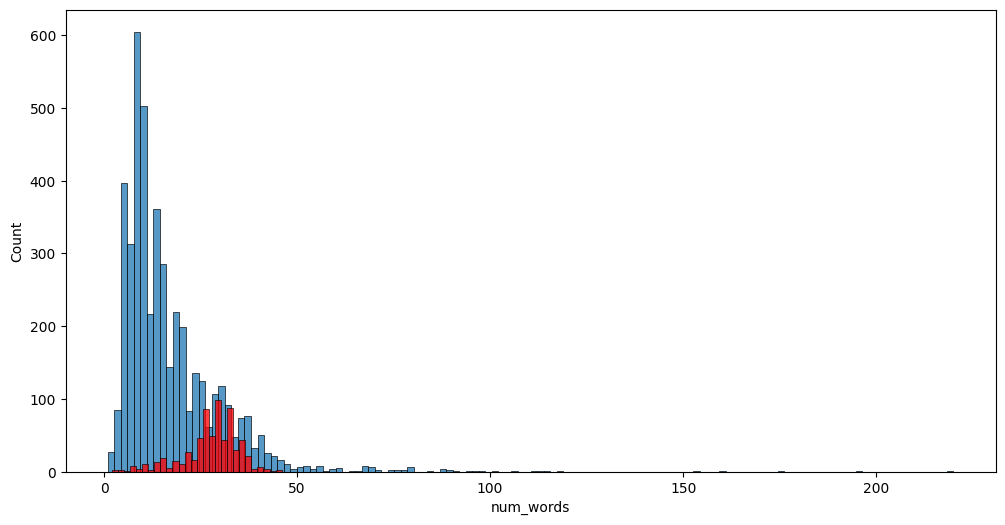

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

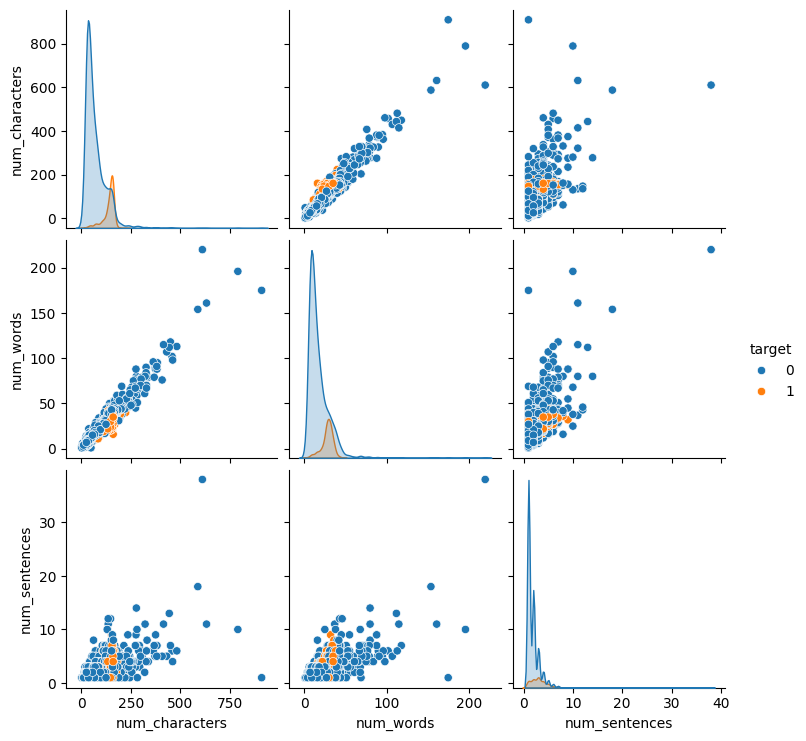

In [39]:
sns.pairplot(df,hue='target')

## Data Preprocessing
-  Lower case
-  Tokenization
-  Removing special characters
-  Removing stop words and punctuation
-  Stemming

In [42]:

import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


#import punc
import string
string.punctuation

#import stem
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91971\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love'

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
#create spam word cloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

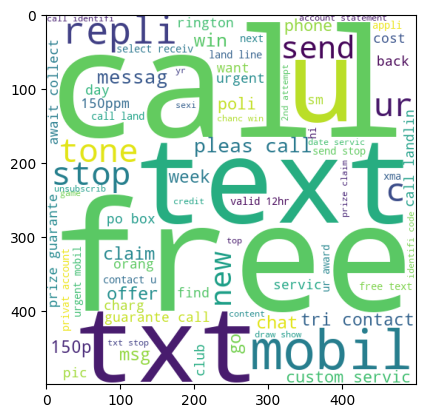

In [52]:
#display wc
plt.imshow(spam_wc)

In [53]:
#create ham word cloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

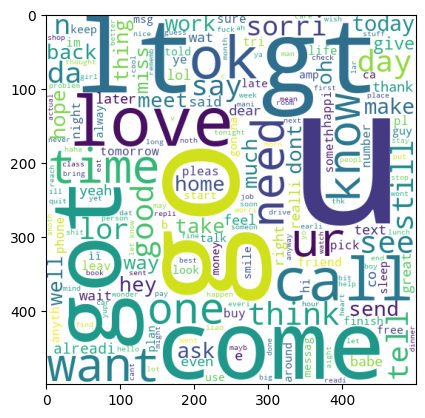

In [54]:
#display wc
plt.imshow(ham_wc)

In [55]:
#List down spam msg words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
 for word in msg.split():
     spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

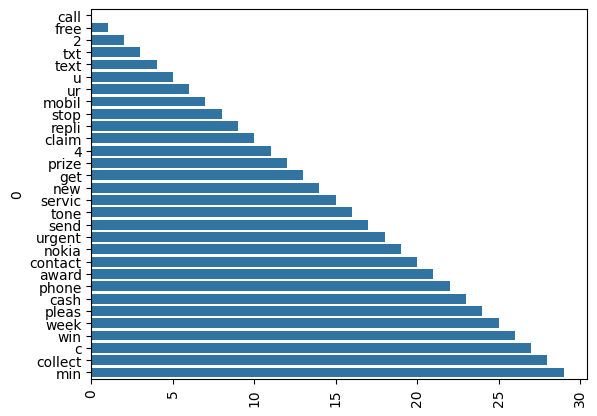

In [57]:
#creating dict of spam_corpus
from collections import Counter
Counter(spam_corpus).most_common(30)

#pd.DataFrame(Counter(spam_corpus).most_common(30))
#add dict in df
#plotting 0  frm df
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
#List down ham msg words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
 for word in msg.split():
     ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

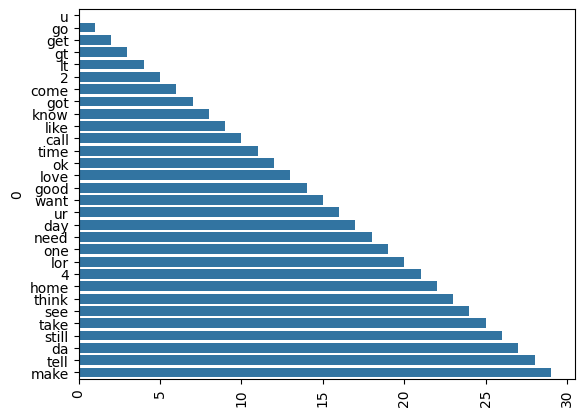

In [60]:
#creating dict of ham_corpus
from collections import Counter
Counter(ham_corpus).most_common(30)

#pd.DataFrame(Counter(ham_corpus).most_common(30))
#add dict in df
#plotting 0 frm df
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [62]:
#Naive Baiyes

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [64]:
X.shape #(sms,words)

(5169, 3000)

In [65]:
#Extract values in Y
Y=df['target'].values

In [66]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [69]:
#import NB models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [70]:
#Obj of NB types
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
#GNB
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1)*100)
print(confusion_matrix(Y_test,y_pred1)*100)
print(precision_score(Y_test,y_pred1)*100)
print(classification_report(Y_test,y_pred1))

86.94390715667312
[[78800 10800]
 [ 2700 11100]]
50.68493150684932
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [72]:
#MNB
mnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1)*100)
print(confusion_matrix(Y_test,y_pred1)*100)
print(precision_score(Y_test,y_pred1)*100)
print(classification_report(Y_test,y_pred1))

86.94390715667312
[[78800 10800]
 [ 2700 11100]]
50.68493150684932
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [73]:
#BNB
bnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1)*100)
print(confusion_matrix(Y_test,y_pred1)*100)
print(precision_score(Y_test,y_pred1)*100)
print(classification_report(Y_test,y_pred1))

86.94390715667312
[[78800 10800]
 [ 2700 11100]]
50.68493150684932
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [74]:
# importing random forest & Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [75]:
# training and testing with Decision tree
dt.fit(X_train,Y_train)
y_pred4=dt.predict(X_test)
print("Accuracy of Decision tree :- ",accuracy_score(Y_test,y_pred4)*100)
print("Precison of Decision tree :- ",precision_score(Y_test,y_pred4)*100)
print("Confusion metrix :",confusion_matrix(Y_test,y_pred4))
print(classification_report(Y_test,y_pred4))

Accuracy of Decision tree :-  94.87427466150871
Precison of Decision tree :-  81.02189781021897
Confusion metrix : [[870  26]
 [ 27 111]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       896
           1       0.81      0.80      0.81       138

    accuracy                           0.95      1034
   macro avg       0.89      0.89      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [76]:
# training and testing with Random forest
rf.fit(X_train,Y_train)
y_pred4=dt.predict(X_test)
print("Accuracy of Decision tree :- ",accuracy_score(Y_test,y_pred4)*100)
print("Precison of Decision tree :- ",precision_score(Y_test,y_pred4)*100)
print("Confusion metrix :",confusion_matrix(Y_test,y_pred4))
print(classification_report(Y_test,y_pred4))

Accuracy of Decision tree :-  94.87427466150871
Precison of Decision tree :-  81.02189781021897
Confusion metrix : [[870  26]
 [ 27 111]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       896
           1       0.81      0.80      0.81       138

    accuracy                           0.95      1034
   macro avg       0.89      0.89      0.89      1034
weighted avg       0.95      0.95      0.95      1034



In [77]:
#import svm
from sklearn.svm import SVC
sv = SVC()

In [78]:
# training and testing with SVM
sv.fit(X_train,Y_train)
y_pred6=sv.predict(X_test)
print("Accuracy of Decision tree :- ",accuracy_score(Y_test,y_pred6)*100)
print("Precison of Decision tree :- ",precision_score(Y_test,y_pred6)*100)
print("Confusion metrix :",confusion_matrix(Y_test,y_pred6))
print(classification_report(Y_test,y_pred6))

Accuracy of Decision tree :-  97.29206963249516
Precison of Decision tree :-  98.24561403508771
Confusion metrix : [[894   2]
 [ 26 112]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.98      0.81      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [79]:
#import Log Reg
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [80]:
# training and testing with Logistics regression
lg.fit(X_train,Y_train)
y_pred7=lg.predict(X_test)
print("Accuracy of Decision tree :- ",accuracy_score(Y_test,y_pred7)*100)
print("Precison of Decision tree :- ",precision_score(Y_test,y_pred7)*100)
print("Confusion metrix :",confusion_matrix(Y_test,y_pred7))
print(classification_report(Y_test,y_pred7))

Accuracy of Decision tree :-  95.64796905222437
Precison of Decision tree :-  97.9381443298969
Confusion metrix : [[894   2]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [81]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [82]:
# training and testing with KNeighborsClassifier
kn.fit(X_train,Y_train)
y_pred8 = kn.predict(X_test)
print("Accuracy of Decision tree :- ",accuracy_score(Y_test,y_pred8)*100)
print("Precison of Decision tree :- ",precision_score(Y_test,y_pred8)*100)
print("Confusion metrix :",confusion_matrix(Y_test,y_pred8))
print(classification_report(Y_test,y_pred8))

Accuracy of Decision tree :-  90.52224371373308
Precison of Decision tree :-  100.0
Confusion metrix : [[896   0]
 [ 98  40]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034



In [83]:
# tfidf --> MNB

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\91971\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

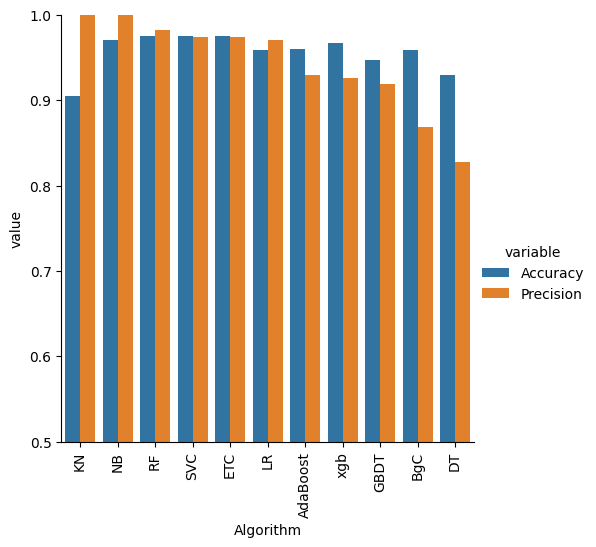

In [94]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [98]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [102]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))